In [1]:
import os
import mediapipe as mp 
import numpy as np
import cv2

## **1. Gesture Collection**

In [ ]:
# mp_holistic = mp.solutions.holistic # Holistic model
# mp_drawing = mp.solutions.drawing_utils # Drawing utilities

# mpHands = mp.solutions.hands
# hands = mpHands.Hands(max_num_hands=2, min_detection_confidence=0.7)

mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.7)
mpDraw = mp.solutions.drawing_utils

In [2]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['Hello', 'Love You', 'Understand', 'Thanks', 'Some', 'Home', 'name', 'my', 'how'])
# actions = np.array(['name'])

# Thirty videos worth of data
no_sequences =  25

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 0

In [4]:
import pickle

with open("gestures.pkl", 'wb') as f:
    pickle.dump(actions, f)

In [ ]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [ ]:
cap = cv2.VideoCapture(0)
    
# NEW LOOP
# Loop through actions
for action in actions:
    # Loop through sequences aka videos
    for sequence in range(start_folder, start_folder+no_sequences):
        # Loop through video length aka sequence length
        for frame_num in range(sequence_length):

            _, frame = cap.read()

            x, y, c = frame.shape

            # Flip the frame vertically
            frame = cv2.flip(frame, 1)
            framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Get hand landmark prediction
            result = holistic.process(framergb)  
            className = ''
            
            # post process the result
            if result.left_hand_landmarks or result.right_hand_landmarks:
                landmarks = []

                lh = [[res.x, res.y] for res in result.left_hand_landmarks.landmark] if result.left_hand_landmarks else np.zeros(21*2).reshape(-1,2).tolist()
                rh = [[res.x, res.y] for res in result.right_hand_landmarks.landmark] if result.right_hand_landmarks else np.zeros(21*2).reshape(-1,2).tolist()
                
                print("Initial: ", np.array(lh).shape, np.array(rh).shape)
                for i in range(len(lh)):
                    landmarks.append(np.append(lh[i], rh[i]).tolist())
                
                # Drawing landmarks on frames
                mpDraw.draw_landmarks(frame, result.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
                mpDraw.draw_landmarks(frame, result.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections


                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(frame, 'STARTING COLLECTION', (120,200), 
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(frame, 'Frames for {} Video Number {}'.format(action, sequence), (15,15), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', frame)
                    cv2.waitKey(1000)
                else: 
                    cv2.putText(frame, 'Frames for {} Video Number {}'.format(action, sequence), (15,12), 
                            -cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', frame)
                
                
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                # npy_path = "./MP_Data/" + action + "_" + str(sequence) + "_" + str(frame_num)
                np.save(npy_path, landmarks)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                
cap.release()
cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

## **2. Alphabet Collection**

In [2]:
mpHands = mp.solutions.hands
hands = mpHands.Hands(max_num_hands=1, min_detection_confidence=0.7)
mpDraw = mp.solutions.drawing_utils

In [6]:
DATA_PATH = os.path.join('MP_Data_Char') 

actions = np.array( [ chr(i) for i in range(ord('O'), ord('S')+1) ] )
# actions = np.array(['E'])
print(actions)

no_sequences =  25
sequence_length = 30
start_folder = 0

['O' 'P' 'Q' 'R' 'S']


In [7]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [8]:
cap = cv2.VideoCapture(0)
    
# NEW LOOP
# Loop through actions
for action in actions:
    # Loop through sequences aka videos
    for sequence in range(start_folder, start_folder+no_sequences):
        # Loop through video length aka sequence length
        for frame_num in range(sequence_length):

            _, frame = cap.read()

            x, y, c = frame.shape

            # Flip the frame vertically
            frame = cv2.flip(frame, 1)
            framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Get hand landmark prediction
            result = hands.process(framergb)  
            className = ''
            
            # post process the result
            if result.multi_hand_landmarks:
                landmarks = []
                for handslms in result.multi_hand_landmarks:
                    for lm in handslms.landmark:
                        # print(id, lm)
                        lmx = int(lm.x * x)
                        lmy = int(lm.y * y)

                        landmarks.append([lmx, lmy])

                    # Drawing landmarks on frames
                    mpDraw.draw_landmarks(frame, handslms, mpHands.HAND_CONNECTIONS)


                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(frame, 'STARTING COLLECTION', (120,200), 
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(frame, 'Frames for {} Video Number {}'.format(action, sequence), (15,15), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', frame)
                    cv2.waitKey(1000)
                else: 
                    cv2.putText(frame, 'Frames for {} Video Number {}'.format(action, sequence), (15,12), 
                            -cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', frame)
                
                
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                # npy_path = "./MP_Data/" + action + "_" + str(sequence) + "_" + str(frame_num)
                np.save(npy_path, landmarks)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                
cap.release()
cv2.destroyAllWindows()

In [37]:
cap.release()
cv2.destroyAllWindows()

## **3. Pre-processing Code**

In [9]:
list_of_files = {}
# MP_Data for gestures, MP_Data_Char for Alphabets
for (dirpath, dirnames, filenames) in os.walk("MP_Data_Char"):
    # print(dirpath, "\n", dirnames, "\n", len(filenames))
    if(len(filenames)!=30):
         print(dirpath, "\n", len(filenames))

MP_Data_Char 
 0
MP_Data_Char\A 
 0
MP_Data_Char\A\11 
 29
MP_Data_Char\A\14 
 29
MP_Data_Char\A\16 
 29
MP_Data_Char\A\18 
 26
MP_Data_Char\A\19 
 29
MP_Data_Char\A\4 
 29
MP_Data_Char\A\6 
 29
MP_Data_Char\A\7 
 29
MP_Data_Char\B 
 0
MP_Data_Char\B\1 
 29
MP_Data_Char\B\15 
 29
MP_Data_Char\B\16 
 29
MP_Data_Char\B\22 
 29
MP_Data_Char\B\8 
 28
MP_Data_Char\C 
 0
MP_Data_Char\C\0 
 29
MP_Data_Char\C\19 
 26
MP_Data_Char\C\22 
 19
MP_Data_Char\C\3 
 29
MP_Data_Char\D 
 0
MP_Data_Char\D\19 
 28
MP_Data_Char\D\22 
 29
MP_Data_Char\D\8 
 29
MP_Data_Char\E 
 0
MP_Data_Char\E\16 
 29
MP_Data_Char\F 
 0
MP_Data_Char\F\15 
 29
MP_Data_Char\G 
 0
MP_Data_Char\G\0 
 29
MP_Data_Char\G\12 
 29
MP_Data_Char\G\14 
 29
MP_Data_Char\G\17 
 28
MP_Data_Char\G\20 
 29
MP_Data_Char\G\6 
 29
MP_Data_Char\G\7 
 29
MP_Data_Char\H 
 0
MP_Data_Char\H\12 
 29
MP_Data_Char\H\15 
 29
MP_Data_Char\H\16 
 29
MP_Data_Char\H\24 
 29
MP_Data_Char\H\4 
 27
MP_Data_Char\I 
 0
MP_Data_Char\I\10 
 29
MP_Data_Char\I\11 


In [14]:
actions = np.array( [ chr(i) for i in range(ord('A'), ord('S')+1) if i!=ord('M') and i!=ord('N')] )

In [15]:
label_map = {label:num for num, label in enumerate(actions)}
print(label_map)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'O': 12, 'P': 13, 'Q': 14, 'R': 15, 'S': 16}


In [16]:
data = []
labels = []

for action in actions:
    for (dirpath, dirnames, filenames) in os.walk(os.path.join("MP_Data_Char", action)):
        if(len(dirnames)==0):
            for filename in filenames:
                data.append(np.load( os.path.join(dirpath, filename) ))
                labels.append(label_map[action])

data = np.array(data)
labels = np.array(labels)
print(data.shape)
print(labels.shape)

(12292, 21, 2)
(12292,)


In [17]:
unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique, counts)))

{0: 739, 1: 744, 2: 733, 3: 746, 4: 749, 5: 749, 6: 742, 7: 743, 8: 740, 9: 737, 10: 747, 11: 748, 12: 748, 13: 748, 14: 383, 15: 748, 16: 748}


In [18]:
# from tensorflow.keras.utils.np_utils import to_categorical
import tensorflow as tf

lab = tf.keras.utils.to_categorical(labels)
print(lab.shape)

(12292, 17)


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, lab, test_size=0.2, random_state=42)

unique, counts = np.unique(np.argmax(y_train, axis=1), return_counts=True)
print(dict(zip(unique, counts)))

unique, counts = np.unique(np.argmax(y_test, axis=1), return_counts=True)
print(dict(zip(unique, counts)))

{0: 584, 1: 591, 2: 587, 3: 594, 4: 587, 5: 610, 6: 605, 7: 599, 8: 602, 9: 581, 10: 600, 11: 587, 12: 606, 13: 597, 14: 293, 15: 601, 16: 609}
{0: 155, 1: 153, 2: 146, 3: 152, 4: 162, 5: 139, 6: 137, 7: 144, 8: 138, 9: 156, 10: 147, 11: 161, 12: 142, 13: 151, 14: 90, 15: 147, 16: 139}


In [20]:
print("Training: ", X_train.shape, y_train.shape)
print("Test: ", X_test.shape, y_test.shape)

Training:  (9833, 21, 2) (9833, 17)
Test:  (2459, 21, 2) (2459, 17)


## **4. Model Training**

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [23]:
model = Sequential([
    Flatten(input_shape=(21, X_train.shape[2])),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(512, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(y_train.shape[1], activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 42)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                2752      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 512)               66048     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 17)                5

In [24]:
callback_checkpoint = ModelCheckpoint(
    './checkpoints/', monitor='val_loss', verbose=0, save_best_only=True,
    save_weights_only=True, mode='auto', save_freq='epoch',
)
callback_loss = EarlyStopping(monitor='loss', patience=4)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    callbacks=[callback_checkpoint, callback_loss])

Epoch 1/50
308/308 [==============================] - 1s 2ms/step - loss: 3.4398 - accuracy: 0.3511
Epoch 2/50
308/308 [==============================] - 1s 2ms/step - loss: 1.0176 - accuracy: 0.6817
Epoch 3/50
308/308 [==============================] - 1s 2ms/step - loss: 0.4064 - accuracy: 0.8908
Epoch 4/50
308/308 [==============================] - 1s 2ms/step - loss: 0.2913 - accuracy: 0.9256
Epoch 5/50
308/308 [==============================] - 1s 2ms/step - loss: 0.2251 - accuracy: 0.9408
Epoch 6/50
308/308 [==============================] - 1s 2ms/step - loss: 0.2222 - accuracy: 0.9402
Epoch 7/50
308/308 [==============================] - 1s 2ms/step - loss: 0.1675 - accuracy: 0.9525
Epoch 8/50
308/308 [==============================] - 1s 2ms/step - loss: 0.1425 - accuracy: 0.9566
Epoch 9/50
308/308 [==============================] - 1s 2ms/step - loss: 0.1679 - accuracy: 0.9511
Epoch 10/50
308/308 [==============================] - 1s 2ms/step - loss: 0.1343 - accuracy: 0.9642

In [26]:
model.save("./checkpoints/alphabets_S_model")

INFO:tensorflow:Assets written to: ./checkpoints/alphabets_S_model\assets


## **5. Model Evaluation and Metrics**

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
y_pred = model.predict(X_test)
y_preds = np.argmax(y_pred, axis=1)

unique, counts = np.unique(y_preds, return_counts=True)
print(dict(zip(unique, counts)))

{0: 209, 1: 160, 2: 145, 3: 140, 4: 160, 5: 142, 6: 137, 7: 138, 8: 88, 9: 234, 10: 152, 11: 174, 12: 144, 13: 152, 14: 70, 15: 134, 16: 80}


In [32]:
def evaluate_model(history,X_test,y_test,model):
  """
    Input: 
      history - Model history variable
      X_test - Test features
      y_test - Target test variables
      model - Keras Model 

    Output:
      Accuracy Plot (Training + Validation)
      Loss Plot (Training + Validation)
      Confusion matrix
      Accuracy
      Classification Report 
  """  
  scores = model.evaluate((X_test),y_test, verbose=0)
  
  fig, axs = plt.subplots(1,3, figsize=(18,6))
  fig.tight_layout()

  axs[0].plot(history.history['accuracy'])
  axs[0].set_xlabel('Epoch')
  axs[0].set_ylabel('Accuracy')
  axs[0].set_title('Model - Accuracy')
  axs[0].legend(['Training'], loc='lower right')

  axs[1].plot(history.history['loss'])
  axs[1].set_xlabel('Epoch')
  axs[1].set_ylabel('Model Loss')
  axs[1].set_title('Model - Loss')
  axs[1].legend(['Training'], loc='upper right')

  target_names=actions
  
  y_true=[]
  for element in y_test:
      y_true.append(np.argmax(element))
  prediction_proba = model.predict(X_test)
  prediction = np.argmax(prediction_proba,axis=1)
  cnf_matrix = confusion_matrix(y_true, prediction)    
  g = sns.heatmap(cnf_matrix, annot=True, cmap='Blues', fmt='g', ax=axs[2],
                  xticklabels=target_names, yticklabels=target_names)
  plt.show()

  print("\nAccuracy: %.2f%% \n" % (scores[1]*100))
  print(classification_report(y_true, prediction, target_names=target_names))

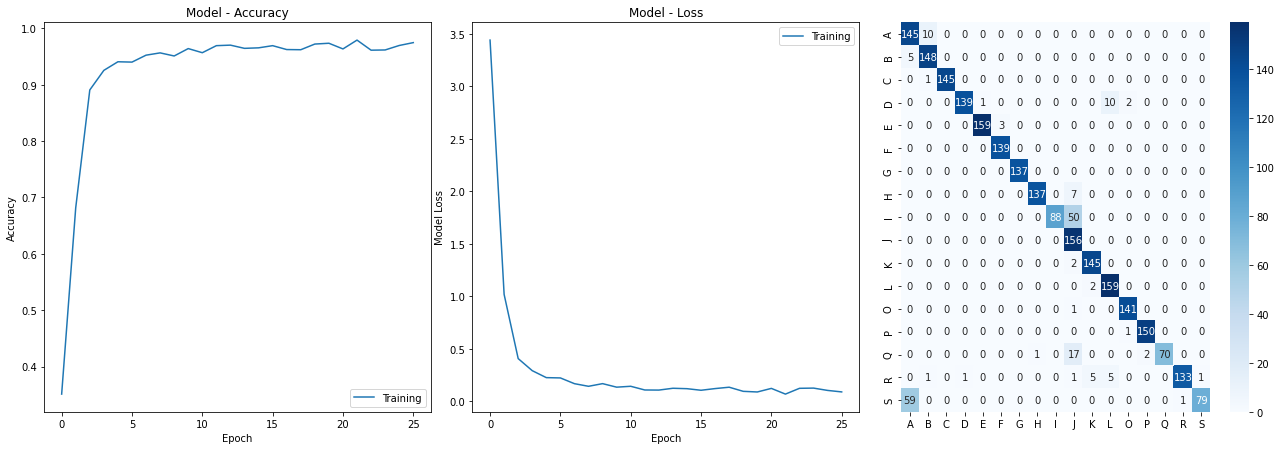


Accuracy: 92.31% 

              precision    recall  f1-score   support

           A       0.69      0.94      0.80       155
           B       0.93      0.97      0.95       153
           C       1.00      0.99      1.00       146
           D       0.99      0.91      0.95       152
           E       0.99      0.98      0.99       162
           F       0.98      1.00      0.99       139
           G       1.00      1.00      1.00       137
           H       0.99      0.95      0.97       144
           I       1.00      0.64      0.78       138
           J       0.67      1.00      0.80       156
           K       0.95      0.99      0.97       147
           L       0.91      0.99      0.95       161
           O       0.98      0.99      0.99       142
           P       0.99      0.99      0.99       151
           Q       1.00      0.78      0.88        90
           R       0.99      0.90      0.95       147
           S       0.99      0.57      0.72       139

    ac

In [33]:
evaluate_model(history, X_test, y_test, model)

## **6. Live testing**

### **a. Gestures**

In [3]:
# Import necessary packages
import cv2
import numpy as np
import pickle
import mediapipe as mp
import tensorflow as tf
from tensorflow.keras.models import load_model

# Initialize mediapipe
mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.7)
mpDraw = mp.solutions.drawing_utils

# Load the gesture recognizer model
model = load_model('checkpoints\\two_hand_9_model')

# Load class names
with open('gestures.pkl','rb') as f:
    actions = pickle.load(f)
print(actions)

sentence = []
predictions = []

def mediapipe_detection(image, model):
    image = cv2.flip(image, 1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    results = model.process(image)                 # Make prediction
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

colors = [(245,117,16), (117,245,16), (16,117,245)]

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[1], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

# Initialize the webcam
cap = cv2.VideoCapture(0)

while True:

    # Read each frame from the webcam
    _, frame = cap.read()
    x, y, c = frame.shape
    frame, result = mediapipe_detection(frame, holistic)
    className = ''

    # Process the result
    if result.left_hand_landmarks or result.right_hand_landmarks:
        landmarks = []

        lh = [[res.x, res.y] for res in result.left_hand_landmarks.landmark] if result.left_hand_landmarks else np.zeros(21*2).reshape(-1,2).tolist()
        rh = [[res.x, res.y] for res in result.right_hand_landmarks.landmark] if result.right_hand_landmarks else np.zeros(21*2).reshape(-1,2).tolist()
        
        for i in range(len(lh)):
            landmarks.append([lh[i][0], lh[i][1], rh[i][0], rh[i][1]])
        
        # Drawing landmarks on frames
        mpDraw.draw_landmarks(frame, result.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
        mpDraw.draw_landmarks(frame, result.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections


        # Predict gesture
        prediction = model.predict([landmarks])
        classID = np.argmax(prediction)
        predictions.append(classID)
        className = actions[classID]

        if np.unique(predictions[-20:])[0] == classID: 
                if prediction[0][classID] > 0.7: 
                    
                    if len(sentence) > 0: 
                        if actions[classID] != sentence[-1]:
                            sentence.append(actions[classID])
                    else:
                        sentence.append(actions[classID])

        if len(sentence) > 5: 
            sentence = sentence[-5:]
        

        frame = prob_viz(prediction[0], actions, frame, colors)

    if cv2.waitKey(1) == ord('r'):
            sentence.pop()
            print("Popped: ", sentence)
            
    # show the prediction on the frame
    cv2.rectangle(frame, (0,0), (640, 40), (255, 140, 51), -1)
    cv2.putText(frame, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    cv2.putText(frame, className, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 
                   1, (0,0,255), 2, cv2.LINE_AA)

    # Show the final output
    cv2.imshow("Output", frame) 

    if cv2.waitKey(1) == ord('q'):
        break

# release the webcam and destroy all active windows
cap.release()

cv2.destroyAllWindows()

['Hello' 'Love You' 'Understand' 'Thanks' 'Some' 'Home' 'name' 'my' 'how']


### **b. Alphabets**

In [8]:
actions = []
for alphabet in os.listdir("./MP_Data_Char"):
    actions.append(alphabet)

with open("alphabets.pkl", 'wb') as f:
    pickle.dump(actions,f)

In [51]:
import cv2
import numpy as np
import mediapipe as mp
import tensorflow as tf
from tensorflow.keras.models import load_model

# initialize mediapipe
mpHands = mp.solutions.hands
hands = mpHands.Hands(max_num_hands=1, min_detection_confidence=0.7)
mpDraw = mp.solutions.drawing_utils

# Load the gesture recognizer model
model = load_model('checkpoints/alphabets_S_model')

# Load class names
with open("alphabets.pkl", 'rb') as f:
    actions = pickle.load(f)
print(actions)

sentence = []
predictions = []

def mediapipe_detection(image, model):
    image = cv2.flip(image, 1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    results = model.process(image)                 # Make prediction
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

colors = [(245,117,16), (117,245,16), (16,117,245)]

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[1], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame


# Initialize the webcam
cap = cv2.VideoCapture(0)

while True:

    # Read each frame from the webcam
    _, frame = cap.read()
    x, y, c = frame.shape
    frame, result = mediapipe_detection(frame, hands)
    className = ''

    # post process the result
    if result.multi_hand_landmarks:
        landmarks = []
        for handslms in result.multi_hand_landmarks:
            for lm in handslms.landmark:
                # print(id, lm)
                lmx = int(lm.x * x)
                lmy = int(lm.y * y)

                landmarks.append([lmx, lmy])

            # Drawing landmarks on frames
            mpDraw.draw_landmarks(frame, handslms, mpHands.HAND_CONNECTIONS)

            # Predict gesture
            prediction = model.predict([landmarks])
            classID = np.argmax(prediction)
            predictions.append(classID)
            className = actions[classID]

            if np.unique(predictions[-20:])[0] == classID: 
                if prediction[0][classID] > 0.7: 
                    
                    if len(sentence) > 0: 
                        if actions[classID] != sentence[-1]:
                            sentence.append(actions[classID])
                    else:
                        sentence.append(actions[classID])

            if len(sentence) > 10: 
                sentence = sentence[-10:]
            
            frame = prob_viz(prediction[0], actions, frame, colors)
    
    if cv2.waitKey(1) == ord('r'):
            if len(sentence) > 0:
                sentence.pop()

    # show the prediction on the frame
    cv2.rectangle(frame, (0,0), (640, 40), (255, 140, 51), -1)
    cv2.putText(frame, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    cv2.putText(frame, className, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 
                   1, (0,0,255), 2, cv2.LINE_AA)

    # Show the final output
    cv2.imshow("Output", frame) 

    if cv2.waitKey(1) == ord('q'):
        break

# release the webcam and destroy all active windows
cap.release()
cv2.destroyAllWindows()

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'O', 'P', 'Q', 'R', 'S']


In [47]:
cap.release()
cv2.destroyAllWindows()